In [129]:
import pandas as pd

In [130]:
res = pd.read_csv("res.csv")
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,error,is_solved
0,1,./A_set/A_,9,18,10,0,17,25,0.01,0.85,15,1507.970,1
1,1,./A_set/A_,7,36,9,3,17,25,0.01,0.85,15,2277.970,1
2,1,./A_set/A_,12,54,10,0,53,25,0.01,0.85,15,800.996,1
3,1,./A_set/A_,10,108,9,40,53,25,0.01,0.85,15,3019.960,1
4,1,./A_set/A_,8,18,9,4,17,25,0.01,0.85,15,745.575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,11,./B_set_rounded/B_,14,297,9,207,191,200,0.07,1.00,15,12988.000,1
13922,12,./B_set_rounded/B_,14,297,9,207,191,200,0.07,1.00,15,12988.000,1
13923,13,./B_set_rounded/B_,14,297,9,207,191,200,0.07,1.00,15,12988.000,1
13924,14,./B_set_rounded/B_,14,297,9,207,191,200,0.07,1.00,15,12988.000,1


In [131]:
res.loc[res["base_path"] == "./A_set/A_", "base_path"] = "A"
res.loc[res["base_path"] != "A", "base_path"] = "B"
res["FILE"] = res["base_path"]+res["instance"].astype(str)
res.head()

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,error,is_solved,FILE
0,1,A,9,18,10,0,17,25,0.01,0.85,15,1507.970,1,A9
1,1,A,7,36,9,3,17,25,0.01,0.85,15,2277.970,1,A7
2,1,A,12,54,10,0,53,25,0.01,0.85,15,800.996,1,A12
3,1,A,10,108,9,40,53,25,0.01,0.85,15,3019.960,1,A10
4,1,A,8,18,9,4,17,25,0.01,0.85,15,745.575,1,A8


In [132]:
res = res[res["FILE"] != "B15"]

In [133]:
res.is_solved.value_counts(normalize=True)

1    0.546264
0    0.453736
Name: is_solved, dtype: float64

### first clean the dirty generated csv file

In [134]:
INF = 99999
res["schedule_error"] = res.apply(lambda x: x["error"] if x["is_solved"] else INF, axis=1)
res["constraint_error"] = res.apply(lambda x: x["error"] if not x["is_solved"] else 0, axis=1)

res = res.drop(labels=["score", "error"], axis=1, errors="ignore")
res

<ipython-input-134-710fd547b8f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["schedule_error"] = res.apply(lambda x: x["error"] if x["is_solved"] else INF, axis=1)
<ipython-input-134-710fd547b8f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["constraint_error"] = res.apply(lambda x: x["error"] if not x["is_solved"] else 0, axis=1)


,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,FILE,schedule_error,constraint_error
0,1,A,9,18,10,0,17,25,0.01,0.85,15,1,A9,1507.970,0.0
1,1,A,7,36,9,3,17,25,0.01,0.85,15,1,A7,2277.970,0.0
2,1,A,12,54,10,0,53,25,0.01,0.85,15,1,A12,800.996,0.0
3,1,A,10,108,9,40,53,25,0.01,0.85,15,1,A10,3019.960,0.0
4,1,A,8,18,9,4,17,25,0.01,0.85,15,1,A8,745.575,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,11,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0
13922,12,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0
13923,13,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0
13924,14,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0


In [135]:
res["constraint_error"] = res["constraint_error"].apply(lambda x: min(x, 1000))
res["config"] = res["population_size"].astype(str) + " " + res["mutation_rate"].astype(str) + " " + res["crossover_rate"].astype(str) + " " + res["minute"].astype(str)


In [136]:
files_solved = res[res.is_solved == 1].groupby('config').aggregate({'FILE': list, 'is_solved': 'sum'}).astype(str).rename(columns={'FILE': 'files_solved', 'is_solved': 'solved_number'})
files_solved

,files_solved,solved_number
config,,
100 0.01 0.85 1,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A11', ...",11
100 0.01 0.85 10,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
100 0.01 0.85 11,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
100 0.01 0.85 12,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
100 0.01 0.85 13,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
...,...,...
50 0.07 1.0 5,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
50 0.07 1.0 6,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
50 0.07 1.0 7,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16


In [137]:
res = res.merge(files_solved, how='left', on='config')
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,FILE,schedule_error,constraint_error,config,files_solved,solved_number
0,1,A,9,18,10,0,17,25,0.01,0.85,15,1,A9,1507.970,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15
1,1,A,7,36,9,3,17,25,0.01,0.85,15,1,A7,2277.970,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15
2,1,A,12,54,10,0,53,25,0.01,0.85,15,1,A12,800.996,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15
3,1,A,10,108,9,40,53,25,0.01,0.85,15,1,A10,3019.960,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15
4,1,A,8,18,9,4,17,25,0.01,0.85,15,1,A8,745.575,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,11,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 11,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15
13916,12,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 12,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15
13917,13,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 13,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15
13918,14,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 14,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15


how many times each instance was solved:

In [138]:
files_solved_count = res[(res.minute == 15) & (res.is_solved == 1)].FILE.value_counts()
files_solved_count = (100) - files_solved_count
files_solved_count /= files_solved_count.sum()
files_solved_count = files_solved_count.rename('file_weight')
files_solved_count

A11    0.057774
A3     0.057774
B8     0.057774
A9     0.057774
A5     0.057774
A8     0.057774
A7     0.057774
A12    0.057774
A1     0.057774
A10    0.057774
A13    0.057774
A2     0.057774
A15    0.058624
A6     0.058624
A14    0.058624
B14    0.059473
B4     0.071368
Name: file_weight, dtype: float64

In [139]:
res = res.merge(files_solved_count, left_on = 'FILE', right_index=True, how='left')
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,FILE,schedule_error,constraint_error,config,files_solved,solved_number,file_weight
0,1,A,9,18,10,0,17,25,0.01,0.85,15,1,A9,1507.970,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
1,1,A,7,36,9,3,17,25,0.01,0.85,15,1,A7,2277.970,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
2,1,A,12,54,10,0,53,25,0.01,0.85,15,1,A12,800.996,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
3,1,A,10,108,9,40,53,25,0.01,0.85,15,1,A10,3019.960,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
4,1,A,8,18,9,4,17,25,0.01,0.85,15,1,A8,745.575,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,11,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 11,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473
13916,12,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 12,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473
13917,13,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 13,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473
13918,14,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 14,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473


In [145]:
res.file_weight = res.file_weight * res.is_solved
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,FILE,schedule_error,constraint_error,config,files_solved,solved_number,file_weight
0,1,A,9,18,10,0,17,25,0.01,0.85,15,1,A9,1507.970,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
1,1,A,7,36,9,3,17,25,0.01,0.85,15,1,A7,2277.970,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
2,1,A,12,54,10,0,53,25,0.01,0.85,15,1,A12,800.996,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
3,1,A,10,108,9,40,53,25,0.01,0.85,15,1,A10,3019.960,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
4,1,A,8,18,9,4,17,25,0.01,0.85,15,1,A8,745.575,0.0,25 0.01 0.85 1,"['A9', 'A7', 'A12', 'A10', 'A8', 'A3', 'A1', '...",15,0.057774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,11,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 11,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473
13916,12,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 12,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473
13917,13,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 13,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473
13918,14,B,14,297,9,207,191,200,0.07,1.00,15,1,B14,12988.000,0.0,200 0.07 1.0 14,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15,0.059473


In [140]:
pd.set_option("max_rows", 59)

In [141]:
res[(res["is_solved"]) & (res["base_path"] == "B")].FILE.unique()

array(['B8', 'B13', 'B14', 'B4'], dtype=object)

In [71]:
res[(res["FILE"] == "B14") & (res["minute"] == 15) & (res["is_solved"])].reset_index(drop=True)

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,FILE,schedule_error,constraint_error,config,files_solved,solved_number
0,15,B,14,297,9,207,191,25,0.01,0.85,15,1,B14,13079.9,0.0,25 0.01 0.85 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",15
1,15,B,14,297,9,207,191,25,0.01,1.00,15,1,B14,13073.9,0.0,25 0.01 1.0 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
2,15,B,14,297,9,207,191,25,0.03,0.85,15,1,B14,13082.8,0.0,25 0.03 0.85 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
3,15,B,14,297,9,207,191,25,0.03,1.00,15,1,B14,13101.1,0.0,25 0.03 1.0 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
4,15,B,14,297,9,207,191,25,0.05,0.85,15,1,B14,12948.6,0.0,25 0.05 0.85 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
5,15,B,14,297,9,207,191,25,0.05,1.00,15,1,B14,12933.9,0.0,25 0.05 1.0 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
6,15,B,14,297,9,207,191,25,0.07,0.85,15,1,B14,12912.1,0.0,25 0.07 0.85 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
7,15,B,14,297,9,207,191,25,0.07,1.00,15,1,B14,12909.9,0.0,25 0.07 1.0 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",16
8,15,B,14,297,9,207,191,50,0.01,0.85,15,1,B14,13158.2,0.0,50 0.01 0.85 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17
9,15,B,14,297,9,207,191,50,0.01,1.00,15,1,B14,13140.8,0.0,50 0.01 1.0 15,"['A9', 'A7', 'A12', 'A8', 'A10', 'A3', 'A1', '...",17


## get best configurations

In [156]:
agg = {}

def err_mean(error):
    arr = error.to_numpy()
    return -arr[arr != INF].mean()

agg["constraint_error"] = err_mean
agg["schedule_error"] = err_mean
agg["is_solved"] = "sum"
agg["FILE"] = "count"
agg["file_weight"] = "sum"

temp = res[res["minute"] == 15]

grouped = temp.groupby(temp["config"]).aggregate(agg)
grouped = grouped.sort_values(by=["file_weight", "schedule_error"], ascending=False)
grouped["schedule_error"] *= -1
grouped = grouped.drop(columns=["constraint_error", "FILE"]).rename(columns={"is_solved": "solved_files_ratio", "file_weight": "solved_files_weight"})
grouped["solved_files_ratio"] /= 30
grouped

,schedule_error,solved_files_ratio,solved_files_weight
config,,,
25 0.01 1.0 15,4947.387706,0.566667,1.000000
50 0.01 1.0 15,4971.480706,0.566667,1.000000
50 0.01 0.85 15,5016.089941,0.566667,1.000000
25 0.03 1.0 15,5024.996412,0.566667,1.000000
50 0.03 0.85 15,5030.736824,0.566667,1.000000
25 0.03 0.85 15,5056.096529,0.566667,1.000000
100 0.03 1.0 15,5068.710294,0.566667,1.000000
100 0.03 0.85 15,5069.036294,0.566667,1.000000
200 0.03 1.0 15,5071.688059,0.566667,1.000000


In [148]:
top_conf = grouped.index[:5]
top_conf

Index(['25 0.01 1.0 15', '50 0.01 1.0 15', '50 0.01 0.85 15', '25 0.03 1.0 15',
       '50 0.03 0.85 15'],
      dtype='object', name='config')

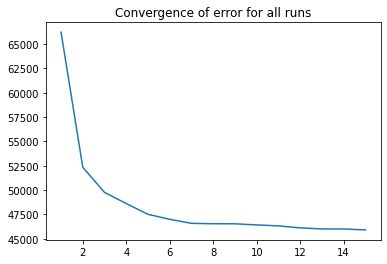

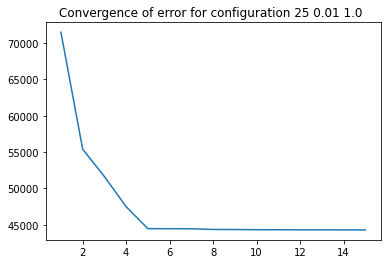

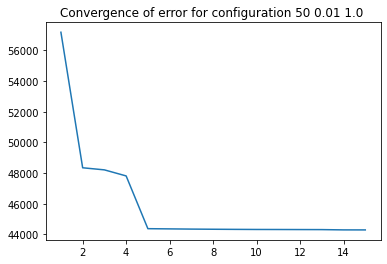

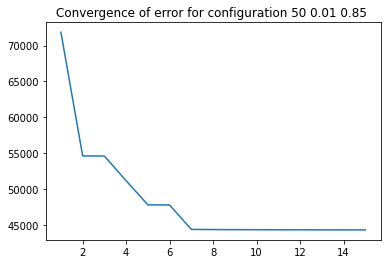

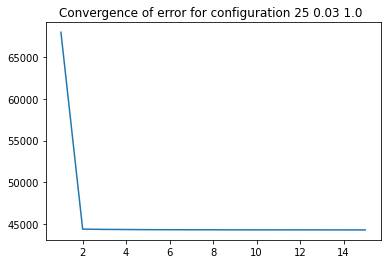

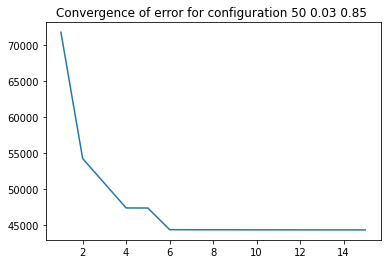

In [149]:
def plot(gf, title):
    import matplotlib.pyplot as plt

    plt.plot(gf.index.tolist(), gf["schedule_error"])
    plt.title(f"Convergence of error {title}")
    plt.show()

plot(res.groupby(by="minute").mean(), "for all runs")
for conf in top_conf:
    plot(res[res.config.str.startswith(conf[:-2])].groupby(by="minute").mean(), f"for configuration {conf[:-2]}")